# 운수회사별 위험운전도 분석

## 1. 운수회사 규모별 버블차트

In [1]:
import pandas as pd
CD_DTG = pd.read_csv("/home/jin_jb/DTG/DATA/CD_DTG.csv")

CD_DTG

,TRANSCO_CD,Speeding,Long-term speeding,Sudden acceleration,Sudden start,Sudden deceleration,Sudden stop,Sudden left turn,Sudden right turn,Sudden U-turn,Sudden overtaking,Sudden lane change,Total_Sum
0,1375,545260,0,3282864,142,1492254,319892,459568,262886,29161,229274,602963,7224264
1,1386,179172,0,2900419,172,1214898,360479,395524,239466,31662,178486,607664,6107942
2,1376,225128,0,2908411,572,985675,235202,361650,205016,49051,187122,660407,5818234
3,1373,183506,0,2851735,756,995762,245403,333730,182160,21659,204999,716121,5735831
4,1384,361202,0,2266239,33,1197247,315906,416765,230364,89193,150240,686505,5713694
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6248,28284,0,0,0,0,0,0,0,0,0,0,0,0
6249,43665,0,0,0,0,0,0,0,0,0,0,0,0
6250,132834,0,0,0,0,0,0,0,0,0,0,0,0
6251,135776,0,0,0,0,0,0,0,0,0,0,0,0


In [2]:
len(CD_DTG['TRANSCO_CD'].unique())

6253

In [3]:
import pandas as pd
DMS_STATB_CORP01 = pd.read_csv("/home/jin_jb/DTG/DATA/AI모델자료/DMS_STATB_CORP01.csv", sep="\t", encoding='UTF-8')
DMS_STATB_CORP01[['CORP_CD','CORP_NM']]

,CORP_CD,CORP_NM
0,1373,대전버스
1,1374,경익운수
2,1375,선진여객
3,1376,협진운수
4,1377,대전교통
...,...,...
82228,32733,쌍마네트워크
82229,32901,은혜통운(주)
82230,33875,(주)코끼리물류
82231,33876,(주)참다운물류


##### CORP_CD = 업체코드, STOP_YMD_FROM = 면허정지기간시작, STOP_YMD_TO = 면허정지기간종료, STOP_DAY = 정지기간, CANCEL_YMD = 면허취소일자, CANCEL_CAUSE = 면허취소사유, RECALL_YMD = 운전면허복귀일자, RETRACTION_CAUSE = 면허취소철회사유

In [4]:
import pandas as pd
DMS_TRATB_SAGO01 = pd.read_csv("/home/jin_jb/DTG/DATA/AI모델자료/DMS_TRATB_SAGO01.csv", sep="\t", encoding = 'UTF-8')

DMS_TRATB_SAGO01 = DMS_TRATB_SAGO01[['CORP_CD','STOP_YMD_FROM','STOP_YMD_TO','STOP_DAY','CANCEL_YMD','CANCEL_CAUSE','RECALL_YMD','RETRACTION_CAUSE']]

DMS_TRATB_SAGO01

/tmp/ipykernel_599603/3997582037.py:2: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  DMS_TRATB_SAGO01 = pd.read_csv("/home/jin_jb/DTG/DATA/AI모델자료/DMS_TRATB_SAGO01.csv", sep="\t", encoding = 'UTF-8')


,CORP_CD,STOP_YMD_FROM,STOP_YMD_TO,STOP_DAY,CANCEL_YMD,CANCEL_CAUSE,RECALL_YMD,RETRACTION_CAUSE
0,3217,NaN,NaN,NaN,19981013.0,30101.0,NaN,NaN
1,1376,NaN,NaN,NaN,19910222.0,30701.0,NaN,NaN
2,1374,NaN,NaN,NaN,19860107.0,30701.0,NaN,NaN
3,1380,NaN,NaN,NaN,20040522.0,33001.0,NaN,NaN
4,3219,NaN,NaN,NaN,19971227.0,30101.0,NaN,NaN
...,...,...,...,...,...,...,...,...
116479,28626,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116480,17792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116481,4522,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116482,17816,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
len(DMS_TRATB_SAGO01['CORP_CD'].unique())

686

In [6]:
print(CD_DTG['TRANSCO_CD'].dtype)
print(DMS_TRATB_SAGO01['CORP_CD'].dtype)

object
int64


In [7]:
import pandas as pd
import numpy as np

# 비정수 값을 NaN으로 대체
CD_DTG['TRANSCO_CD'] = pd.to_numeric(CD_DTG['TRANSCO_CD'], errors='coerce')

# NaN 값을 제거
CD_DTG = CD_DTG.dropna(subset=['TRANSCO_CD'])

# 이제 안전하게 정수형으로 변환 가능
CD_DTG['TRANSCO_CD'] = CD_DTG['TRANSCO_CD'].astype(int)


# DMS_TRATB_SAGO01에서 고유한 CORP_CD 값을 추출
transco_cd_list = DMS_TRATB_SAGO01['CORP_CD'].unique()

# CD_DTG에서 TRANSCO_CD가 transco_cd_list에 속하는 행만 필터링
filtered_cd_dtg = CD_DTG[CD_DTG['TRANSCO_CD'].isin(transco_cd_list)]

# 필터링된 결과 확인
filtered_cd_dtg.reset_index(drop = True, inplace = True)
filtered_cd_dtg

/tmp/ipykernel_599603/1743091570.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CD_DTG['TRANSCO_CD'] = CD_DTG['TRANSCO_CD'].astype(int)


,TRANSCO_CD,Speeding,Long-term speeding,Sudden acceleration,Sudden start,Sudden deceleration,Sudden stop,Sudden left turn,Sudden right turn,Sudden U-turn,Sudden overtaking,Sudden lane change,Total_Sum
0,1375,545260,0,3282864,142,1492254,319892,459568,262886,29161,229274,602963,7224264
1,1386,179172,0,2900419,172,1214898,360479,395524,239466,31662,178486,607664,6107942
2,1376,225128,0,2908411,572,985675,235202,361650,205016,49051,187122,660407,5818234
3,1373,183506,0,2851735,756,995762,245403,333730,182160,21659,204999,716121,5735831
4,1384,361202,0,2266239,33,1197247,315906,416765,230364,89193,150240,686505,5713694
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,14847,1,0,3,0,0,6,0,0,0,0,0,10
208,14263,0,0,6,0,1,0,0,0,0,0,2,9
209,6302,2,0,0,0,0,0,0,0,0,0,0,2
210,37361,1,0,0,0,0,0,0,0,0,0,0,1


In [8]:
transco_cd_values = filtered_cd_dtg['TRANSCO_CD']

# CORP_CD가 transco_cd_values에 속하는 행만 필터링
DMS_TRATB_SAGO = DMS_TRATB_SAGO01[DMS_TRATB_SAGO01['CORP_CD'].isin(transco_cd_values)]

DMS_TRATB_SAGO = DMS_TRATB_SAGO[DMS_TRATB_SAGO['CORP_CD']!=15666]

DMS_TRATB_SAGO

,CORP_CD,STOP_YMD_FROM,STOP_YMD_TO,STOP_DAY,CANCEL_YMD,CANCEL_CAUSE,RECALL_YMD,RETRACTION_CAUSE
1,1376,NaN,NaN,NaN,19910222.0,30701.0,NaN,NaN
2,1374,NaN,NaN,NaN,19860107.0,30701.0,NaN,NaN
3,1380,NaN,NaN,NaN,20040522.0,33001.0,NaN,NaN
5,1374,NaN,NaN,NaN,19900328.0,31101.0,NaN,NaN
6,12801,NaN,NaN,NaN,20110730.0,33001.0,NaN,NaN
...,...,...,...,...,...,...,...,...
116476,1383,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116478,17826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116479,28626,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116480,17792,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
len(DMS_TRATB_SAGO['CORP_CD'].unique())

211

In [10]:
import pandas as pd

A = DMS_TRATB_SAGO.copy()

# 면허정지와 면허취소 날짜가 있는 행을 확인
A['has_stop'] = A['STOP_YMD_FROM'].notna()
A['has_cancel'] = A['CANCEL_YMD'].notna()

# 운수회사별로 면허정지와 면허취소의 개수를 집계
result = A.groupby('CORP_CD').agg(
    stop_count=('has_stop', 'sum'),
    cancel_count=('has_cancel', 'sum')
)

# 면허정지와 면허취소의 총 개수를 계산
result['total_count'] = result['stop_count'] + result['cancel_count']

result = result.sort_values(['total_count'],ascending = False).reset_index()

# result = result.iloc[1:].reset_index(drop= True)

result


,CORP_CD,stop_count,cancel_count,total_count
0,1373,161,33,194
1,17830,152,39,191
2,1375,129,39,168
3,1384,136,24,160
4,1386,130,27,157
...,...,...,...,...
206,29993,0,0,0
207,29708,0,0,0
208,25677,0,0,0
209,23212,0,0,0


In [11]:
import pandas as pd 
ratio = pd.read_csv("/home/jin_jb/DTG/DATA/ratio.csv")
ratio

,TRANSCO_CD,Total_Sum,CAR_REG_NO,ratio,bubble_size
0,1375,7224264,104,69464.076923,694.640769
1,1386,6107942,92,66390.673913,663.906739
2,1376,5818234,89,65373.415730,653.734157
3,1380,3692614,65,56809.446154,568.094462
4,1373,5735831,101,56790.405941,567.904059
...,...,...,...,...,...
211,14263,9,1,9.000000,0.090000
212,32945,4,1,4.000000,0.040000
213,6302,2,2,1.000000,0.010000
214,37361,1,1,1.000000,0.010000


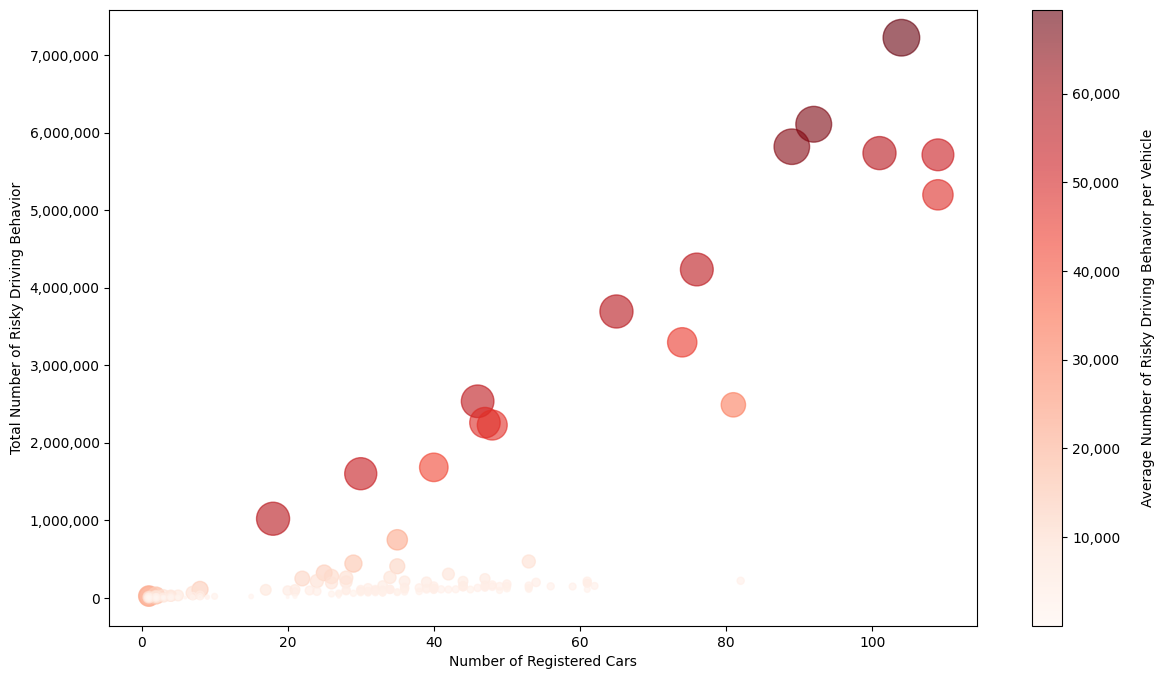

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 비율(ratio) 열을 계산합니다: 위험운전 횟수 / 차량 등록 개수
ratio['ratio'] = ratio['Total_Sum'] / ratio['CAR_REG_NO']

# 버블 크기를 위한 스케일링 팩터 (버블 크기가 적절한지 확인하고 조정할 수 있습니다)
size_scaling_factor = 0.01

# 색상을 위한 스케일링 (버블 색상이 적절한지 확인하고 조정할 수 있습니다)
color_scaling_factor = 100

# 버블 크기 설정
ratio['bubble_size'] = ratio['ratio'] * size_scaling_factor

# 버블 차트 그리기
plt.figure(figsize=(14, 8))
scatter = plt.scatter('CAR_REG_NO', 'Total_Sum', 
                      s='bubble_size', 
                      c='ratio', 
                      cmap='Reds', 
                      alpha=0.6, 
                      data=ratio)

from matplotlib.ticker import FuncFormatter

# 천 단위로 쉼표를 추가하는 함수
def thousand_separator(x, pos):
    return '{:,.0f}'.format(x)

cbar = plt.colorbar(scatter)
cbar.set_label('Average Number of Risky Driving Behavior per Vehicle', rotation=90, labelpad=15)

# FuncFormatter를 사용하여 컬러 바의 숫자 형식을 변경
cbar.formatter = FuncFormatter(thousand_separator)
cbar.update_ticks()
plt.xlabel('Number of Registered Cars')
plt.ylabel('Total Number of Risky Driving Behavior')
# y축 레이블 형식 변경
plt.gca().ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
# plt.title('Bubble Chart of Dangerous Driving Instances per Registered Car')

plt.grid(False)
plt.show()


## 2. 그룹별 운수회사 면허 정지 취소 DataFrame

In [13]:
import pandas as pd

# 각 구간별 경계 인덱스 계산
total = len(ratio)
boundaries = {
    'Grouped_1': int(total * 0.1),  # 상위 10%
    'Grouped_2': int(total * 0.3),  # 상위 30%
    'Grouped_3': int(total * 0.5),  # 상위 50%
    'Grouped_4': int(total * 0.7),  # 상위 70%
    'Grouped_5': total              # 나머지
}

# 각 구간별로 그룹 할당
# labels = ['Grouped_E', 'Grouped_D', 'Grouped_C', 'Grouped_B', 'Grouped_A']
labels = ['Grouped_1', 'Grouped_2', 'Grouped_3', 'Grouped_4', 'Grouped_5']
ratio['Group'] = pd.cut(ratio.index + 1, bins=[0] + list(boundaries.values()), labels=labels, right=True)

ratio

,TRANSCO_CD,Total_Sum,CAR_REG_NO,ratio,bubble_size,Group
0,1375,7224264,104,69464.076923,694.640769,Grouped_1
1,1386,6107942,92,66390.673913,663.906739,Grouped_1
2,1376,5818234,89,65373.415730,653.734157,Grouped_1
3,1380,3692614,65,56809.446154,568.094462,Grouped_1
4,1373,5735831,101,56790.405941,567.904059,Grouped_1
...,...,...,...,...,...,...
211,14263,9,1,9.000000,0.090000,Grouped_5
212,32945,4,1,4.000000,0.040000,Grouped_5
213,6302,2,2,1.000000,0.010000,Grouped_5
214,37361,1,1,1.000000,0.010000,Grouped_5


In [14]:
print(len(ratio[ratio['Group'] == 'Grouped_1']))
print(len(ratio[ratio['Group'] == 'Grouped_2']))
print(len(ratio[ratio['Group'] == 'Grouped_3']))
print(len(ratio[ratio['Group'] == 'Grouped_4']))
print(len(ratio[ratio['Group'] == 'Grouped_5']))


21
43
44
43
65


### Grouped_1

In [15]:
Grouped_a = ratio[ratio['Group']=='Grouped_1']

# 필터링된 행의 'TRANSCO_CD' 추출
Grouped_A = Grouped_a['TRANSCO_CD'].tolist()

print(len(Grouped_A))
print(Grouped_A)

21
[1375, 1386, 1376, 1380, 1373, 28814, 1378, 1382, 25288, 1384, 1383, 1374, 1381, 17830, 1385, 1377, 14316, 29993, 24621, 33238, 14741]


In [16]:
# 필터링된 결과를 저장할 빈 리스트 초기화
filtered_frames = []

# 각 'CORP_CD'에 대해 필터링 수행
for corp_cd in Grouped_A:
    # 'corp_cd'를 정수로 처리하여 현재 'CORP_CD'에 해당하는 행 필터링
    temp_df = DMS_TRATB_SAGO[(DMS_TRATB_SAGO['CORP_CD'] == corp_cd)]
    
    # 결과가 비어있지 않다면 리스트에 추가
    if not temp_df.empty:
        filtered_frames.append(temp_df)

# 모든 필터링된 결과를 하나의 DataFrame으로 합치기
license_A = pd.concat(filtered_frames)

# 결과 출력
print(f"Grouped_1의 등록된 개수: {len(license_A)}")
print(f"Grouped_1의 등록된 운수회사 개수: {len(license_A['CORP_CD'].unique())}")
print(f"Grouped_1의 면허 정지 개수: {len(license_A[license_A['STOP_YMD_FROM'].notnull()])}")
print(f"Grouped_1의 면허 취소 개수: {len(license_A[license_A['CANCEL_YMD'].notnull()])}")
print(f"Grouped_1의 면허 취소 철회 개수: {len(license_A[license_A['RECALL_YMD'].notna() & license_A['CANCEL_YMD'].notna()])}")
license_A.reset_index(drop=True)




Grouped_1의 등록된 개수: 18931
Grouped_1의 등록된 운수회사 개수: 21
Grouped_1의 면허 정지 개수: 1463
Grouped_1의 면허 취소 개수: 371
Grouped_1의 면허 취소 철회 개수: 53


,CORP_CD,STOP_YMD_FROM,STOP_YMD_TO,STOP_DAY,CANCEL_YMD,CANCEL_CAUSE,RECALL_YMD,RETRACTION_CAUSE
0,1375,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1375,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1375,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1375,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1375,NaN,NaN,NaN,20050524.0,32301.0,NaN,NaN
...,...,...,...,...,...,...,...,...
18926,14741,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18927,14741,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18928,14741,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18929,14741,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Grouped_2

In [17]:
Grouped_b = ratio[ratio['Group']=='Grouped_2']

# 필터링된 행의 'TRANSCO_CD' 추출
Grouped_B = Grouped_b['TRANSCO_CD'].tolist()

print(len(Grouped_B))
print(Grouped_B)

43
[14188, 14798, 25944, 29454, 3212, 3227, 3209, 23112, 26019, 28882, 33436, 24636, 3214, 3232, 22478, 25321, 23212, 14731, 24249, 23536, 25565, 42644, 22098, 25959, 14823, 14308, 29828, 30342, 22477, 3211, 22308, 17812, 14046, 17821, 17808, 17826, 33770, 17848, 17797, 17818, 17773, 17807, 33578]


In [18]:
# 필터링된 결과를 저장할 빈 리스트 초기화
filtered_frames = []

# 각 'CORP_CD'에 대해 필터링 수행
for corp_cd in Grouped_B:
    # 'corp_cd'를 정수로 처리하여 현재 'CORP_CD'에 해당하는 행 필터링
    temp_df = DMS_TRATB_SAGO[(DMS_TRATB_SAGO['CORP_CD'] == corp_cd)]
    
    # 결과가 비어있지 않다면 리스트에 추가
    if not temp_df.empty:
        filtered_frames.append(temp_df)

# 모든 필터링된 결과를 하나의 DataFrame으로 합치기
license_B = pd.concat(filtered_frames)

# 결과 출력
print(f"Grouped_2의 등록된 개수: {len(license_B)}")
print(f"Grouped_2의 등록된 운수회사 개수: {len(license_B['CORP_CD'].unique())}")
print(f"Grouped_2의 면허 정지 개수: {len(license_B[license_B['STOP_YMD_FROM'].notnull()])}")
print(f"Grouped_2의 면허 취소 개수: {len(license_B[license_B['CANCEL_YMD'].notnull()])}")
print(f"Grouped_2의 면허 취소 철회 개수: {len(license_B[license_B['RECALL_YMD'].notna() & license_B['CANCEL_YMD'].notna()])}")
license_B.reset_index(drop=True)


Grouped_2의 등록된 개수: 7522
Grouped_2의 등록된 운수회사 개수: 42
Grouped_2의 면허 정지 개수: 737
Grouped_2의 면허 취소 개수: 249
Grouped_2의 면허 취소 철회 개수: 48


,CORP_CD,STOP_YMD_FROM,STOP_YMD_TO,STOP_DAY,CANCEL_YMD,CANCEL_CAUSE,RECALL_YMD,RETRACTION_CAUSE
0,14188,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14188,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14188,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14188,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14188,NaN,NaN,NaN,20041214.0,31101.0,NaN,NaN
...,...,...,...,...,...,...,...,...
7517,33578,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7518,33578,20170927.0,20170927.0,0.0,NaN,NaN,NaN,NaN
7519,33578,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7520,33578,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Grouped_3

In [19]:
Grouped_c = ratio[ratio['Group']=='Grouped_3']

# 필터링된 행의 'TRANSCO_CD' 추출
Grouped_C = Grouped_c['TRANSCO_CD'].tolist()

print(len(Grouped_C))
print(Grouped_C)

44
[24773, 17834, 17782, 17828, 14750, 17804, 17841, 28994, 23221, 17816, 17771, 17779, 14763, 17793, 17792, 17823, 17827, 17846, 17774, 17777, 17810, 17775, 17803, 17809, 17839, 17778, 33011, 25568, 17833, 17791, 17811, 17835, 17802, 17814, 17815, 17799, 17784, 14717, 14366, 17838, 17832, 17842, 17836, 17845]


In [20]:
# 필터링된 결과를 저장할 빈 리스트 초기화
filtered_frames = []

# 각 'CORP_CD'에 대해 필터링 수행
for corp_cd in Grouped_C:
    # 'corp_cd'를 정수로 처리하여 현재 'CORP_CD'에 해당하는 행 필터링
    temp_df = DMS_TRATB_SAGO[(DMS_TRATB_SAGO['CORP_CD'] == corp_cd)]
    
    # 결과가 비어있지 않다면 리스트에 추가
    if not temp_df.empty:
        filtered_frames.append(temp_df)

# 모든 필터링된 결과를 하나의 DataFrame으로 합치기
license_C = pd.concat(filtered_frames)

# 결과 출력
print(f"Grouped_3의 등록된 개수: {len(license_C)}")
print(f"Grouped_3의 등록된 운수회사 개수: {len(license_C['CORP_CD'].unique())}")
print(f"Grouped_3의 면허 정지 개수: {len(license_C[license_C['STOP_YMD_FROM'].notnull()])}")
print(f"Grouped_3의 면허 취소 개수: {len(license_C[license_C['CANCEL_YMD'].notnull()])}")
print(f"Grouped_3의 면허 취소 철회 개수: {len(license_C[license_C['RECALL_YMD'].notna() & license_C['CANCEL_YMD'].notna()])}")
license_C.reset_index(drop=True)


Grouped_3의 등록된 개수: 21119
Grouped_3의 등록된 운수회사 개수: 42
Grouped_3의 면허 정지 개수: 1937
Grouped_3의 면허 취소 개수: 643
Grouped_3의 면허 취소 철회 개수: 83


,CORP_CD,STOP_YMD_FROM,STOP_YMD_TO,STOP_DAY,CANCEL_YMD,CANCEL_CAUSE,RECALL_YMD,RETRACTION_CAUSE
0,24773,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24773,NaN,NaN,NaN,NaN,NaN,20161118.0,NaN
2,24773,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24773,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24773,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
21114,17845,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21115,17845,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21116,17845,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21117,17845,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Grouped_4

In [21]:
Grouped_d = ratio[ratio['Group']=='Grouped_4']

# 필터링된 행의 'TRANSCO_CD' 추출
Grouped_D = Grouped_d['TRANSCO_CD'].tolist()

print(len(Grouped_D))
print(Grouped_D)

43
[17817, 17813, 17801, 17788, 17780, 17819, 17844, 17800, 17786, 14057, 17837, 17795, 17806, 17829, 17796, 26749, 17783, 17776, 17789, 17794, 17822, 17849, 14774, 17785, 3237, 17824, 17772, 12801, 17825, 17790, 38279, 17805, 14831, 17787, 17843, 31075, 14313, 17847, 27203, 17840, 3241, 27206, 17831]


In [22]:
# 필터링된 결과를 저장할 빈 리스트 초기화
filtered_frames = []

# 각 'CORP_CD'에 대해 필터링 수행
for corp_cd in Grouped_D:
    # 'corp_cd'를 정수로 처리하여 현재 'CORP_CD'에 해당하는 행 필터링
    temp_df = DMS_TRATB_SAGO[(DMS_TRATB_SAGO['CORP_CD'] == corp_cd)]
    
    # 결과가 비어있지 않다면 리스트에 추가
    if not temp_df.empty:
        filtered_frames.append(temp_df)

# 모든 필터링된 결과를 하나의 DataFrame으로 합치기
license_D = pd.concat(filtered_frames)

# 결과 출력
print(f"Grouped_4의 등록된 개수: {len(license_D)}")
print(f"Grouped_4의 등록된 운수회사 개수: {len(license_D['CORP_CD'].unique())}")
print(f"Grouped_4의 면허 정지 개수: {len(license_D[license_D['STOP_YMD_FROM'].notnull()])}")
print(f"Grouped_4의 면허 취소 개수: {len(license_D[license_D['CANCEL_YMD'].notnull()])}")
print(f"Grouped_4의 면허 취소 철회 개수: {len(license_D[license_D['RECALL_YMD'].notna() & license_D['CANCEL_YMD'].notna()])}")
license_D.reset_index(drop=True)


Grouped_4의 등록된 개수: 19261
Grouped_4의 등록된 운수회사 개수: 43
Grouped_4의 면허 정지 개수: 1765
Grouped_4의 면허 취소 개수: 531
Grouped_4의 면허 취소 철회 개수: 58


,CORP_CD,STOP_YMD_FROM,STOP_YMD_TO,STOP_DAY,CANCEL_YMD,CANCEL_CAUSE,RECALL_YMD,RETRACTION_CAUSE
0,17817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
19256,17831,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19257,17831,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19258,17831,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19259,17831,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Grouped_5

In [23]:
Grouped_e = ratio[ratio['Group']=='Grouped_5']

# 필터링된 행의 'TRANSCO_CD' 추출
Grouped_E = Grouped_e['TRANSCO_CD'].tolist()

print(len(Grouped_E))
print(Grouped_E)

65
[24638, 14795, 31351, 14735, 22540, 14304, 34918, 24971, 24635, 14258, 25661, 14165, 14726, 28626, 35261, 32526, 14071, 14746, 22964, 22461, 10917, 14043, 24335, 14072, 14749, 14759, 14065, 29708, 24679, 29591, 14736, 14770, 14734, 3235, 25677, 14327, 22199, 14323, 14107, 14309, 14790, 14055, 14769, 35995, 24640, 23236, 10205, 14371, 14311, 36733, 24637, 14475, 23534, 33889, 37521, 34242, 34957, 24451, 14255, 14847, 14263, 32945, 6302, 37361, 24970]


In [24]:
# 필터링된 결과를 저장할 빈 리스트 초기화
filtered_frames = []

# 각 'CORP_CD'에 대해 필터링 수행
for corp_cd in Grouped_E:
    # 'corp_cd'를 정수로 처리하여 현재 'CORP_CD'에 해당하는 행 필터링
    temp_df = DMS_TRATB_SAGO[(DMS_TRATB_SAGO['CORP_CD'] == corp_cd)]
    
    # 결과가 비어있지 않다면 리스트에 추가
    if not temp_df.empty:
        filtered_frames.append(temp_df)

# 모든 필터링된 결과를 하나의 DataFrame으로 합치기
license_E = pd.concat(filtered_frames)

# 결과 출력
print(f"Grouped_5의 등록된 개수: {len(license_E)}")
print(f"Grouped_5의 등록된 운수회사 개수: {len(license_E['CORP_CD'].unique())}")
print(f"Grouped_5의 면허 정지 개수: {len(license_E[license_E['STOP_YMD_FROM'].notnull()])}")
print(f"Grouped_5의 면허 취소 개수: {len(license_E[license_E['CANCEL_YMD'].notnull()])}")
print(f"Grouped_5의 면허 취소 철회 개수: {len(license_E[license_E['RECALL_YMD'].notna() & license_E['CANCEL_YMD'].notna()])}")
license_E.reset_index(drop=True)


Grouped_5의 등록된 개수: 7252
Grouped_5의 등록된 운수회사 개수: 63
Grouped_5의 면허 정지 개수: 714
Grouped_5의 면허 취소 개수: 370
Grouped_5의 면허 취소 철회 개수: 80


,CORP_CD,STOP_YMD_FROM,STOP_YMD_TO,STOP_DAY,CANCEL_YMD,CANCEL_CAUSE,RECALL_YMD,RETRACTION_CAUSE
0,24638,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24638,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24638,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24638,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24638,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
7247,24970,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7248,24970,20160712.0,20160712.0,0.0,NaN,NaN,NaN,NaN
7249,24970,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7250,24970,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. 그룹별 위험운전

In [25]:
CD_DTG

,TRANSCO_CD,Speeding,Long-term speeding,Sudden acceleration,Sudden start,Sudden deceleration,Sudden stop,Sudden left turn,Sudden right turn,Sudden U-turn,Sudden overtaking,Sudden lane change,Total_Sum
0,1375,545260,0,3282864,142,1492254,319892,459568,262886,29161,229274,602963,7224264
1,1386,179172,0,2900419,172,1214898,360479,395524,239466,31662,178486,607664,6107942
2,1376,225128,0,2908411,572,985675,235202,361650,205016,49051,187122,660407,5818234
3,1373,183506,0,2851735,756,995762,245403,333730,182160,21659,204999,716121,5735831
4,1384,361202,0,2266239,33,1197247,315906,416765,230364,89193,150240,686505,5713694
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6248,28284,0,0,0,0,0,0,0,0,0,0,0,0
6249,43665,0,0,0,0,0,0,0,0,0,0,0,0
6250,132834,0,0,0,0,0,0,0,0,0,0,0,0
6251,135776,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
# CD_DTG DataFrame에 'Group' 열 추가
CD_DTG['Group'] = None

# 각 그룹과 그룹 이름을 순회하며 'Group' 열에 그룹 이름 할당
groups = [Grouped_A, Grouped_B, Grouped_C, Grouped_D, Grouped_E]
group_names = ['Group_1', 'Group_2', 'Group_3', 'Group_4', 'Group_5']

for group, name in zip(groups, group_names):
    # 해당 그룹에 속하는 TRANSCO_CD 값을 가진 행의 'Group' 열에 그룹 이름 할당
    CD_DTG.loc[CD_DTG['TRANSCO_CD'].isin(group), 'Group'] = name

# 'Group' 열이 None인 행들 제거
CD_DTG = CD_DTG.dropna(subset=['Group'])

# 결과 출력
CD_DTG.reset_index(drop= True)


/tmp/ipykernel_599603/1101193131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CD_DTG['Group'] = None


,TRANSCO_CD,Speeding,Long-term speeding,Sudden acceleration,Sudden start,Sudden deceleration,Sudden stop,Sudden left turn,Sudden right turn,Sudden U-turn,Sudden overtaking,Sudden lane change,Total_Sum,Group
0,1375,545260,0,3282864,142,1492254,319892,459568,262886,29161,229274,602963,7224264,Group_1
1,1386,179172,0,2900419,172,1214898,360479,395524,239466,31662,178486,607664,6107942,Group_1
2,1376,225128,0,2908411,572,985675,235202,361650,205016,49051,187122,660407,5818234,Group_1
3,1373,183506,0,2851735,756,995762,245403,333730,182160,21659,204999,716121,5735831,Group_1
4,1384,361202,0,2266239,33,1197247,315906,416765,230364,89193,150240,686505,5713694,Group_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,14263,0,0,6,0,1,0,0,0,0,0,2,9,Group_5
212,32945,2,0,0,0,0,1,1,0,0,0,0,4,Group_5
213,6302,2,0,0,0,0,0,0,0,0,0,0,2,Group_5
214,37361,1,0,0,0,0,0,0,0,0,0,0,1,Group_5


In [27]:
# data_cd_dtg = CD_DTG[['TRANSCO_CD','Group']]
# data_cd_dtg.to_csv('DATA/data_cd_dtg.csv', index=False)

In [28]:
Group_CD_DTG = CD_DTG.groupby(['Group'])[['Speeding', 'Long-term speeding', 'Sudden acceleration', 'Sudden start', 
                                'Sudden deceleration', 'Sudden stop', 'Sudden left turn', 'Sudden right turn', 
                                'Sudden U-turn', 'Sudden overtaking', 'Sudden lane change','Total_Sum']].sum().reset_index()
Group_CD_DTG

,Group,Speeding,Long-term speeding,Sudden acceleration,Sudden start,Sudden deceleration,Sudden stop,Sudden left turn,Sudden right turn,Sudden U-turn,Sudden overtaking,Sudden lane change,Total_Sum
0,Group_1,3693059,0,26643754,29480,12775301,3966704,4320075,2483032,525194,1705629,5944930,62087158
1,Group_2,1358500,0,3419857,6277,668154,224278,202088,134660,17640,107112,249802,6388368
2,Group_3,1285408,0,2717134,14966,287122,127705,4828,4424,1052,3075,7390,4453104
3,Group_4,895995,0,1845035,9149,205956,92683,10898,6221,992,4828,20422,3092179
4,Group_5,27694,0,44991,170,21302,8483,4643,5065,1685,2148,23767,139948


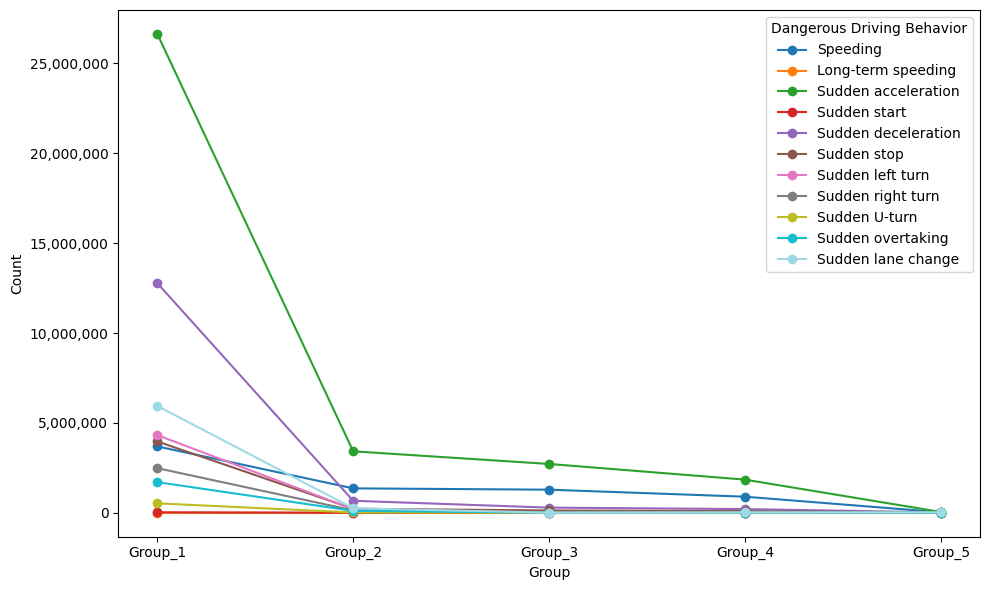

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.ticker as ticker


# 'Group' 열을 인덱스로 설정하고 'Total_Sum' 열 제거
A = Group_CD_DTG.set_index('Group')
A.drop(columns=['Total_Sum'], inplace=True)

# 데이터 프레임 전치 (행과 열 바꾸기)
df_transposed = A.T
# 그래프 그리기 (11대 위험운전 행동을 범례로, x축에 Group)
plt.figure(figsize=(10, 6))

color_cycle = cm.tab20(np.linspace(0, 1, 11))

for i, behavior in enumerate(df_transposed.index):
    plt.plot(df_transposed.columns, df_transposed.loc[behavior], marker='o', label=behavior, color=color_cycle[i])

plt.ylabel('Count')
# plt.title('Comparison of 11 Dangerous Driving Behaviors Across Groups')
plt.xlabel('Group')
plt.xticks()
plt.legend(title='Dangerous Driving Behavior', bbox_to_anchor=(1, 1))
plt.gca().ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()

plt.show()


## 4. 그룹1과 그룹5의 운수회사 분석

In [30]:
# 'CORP_CD'와 'REPORT_YM'을 기준으로 정렬
sorted_df = DMS_STATB_CORP01.sort_values(by=['CORP_CD', 'REPORT_YM'], ascending=[True, False])

# 'CORP_CD'별로 첫 번째 행만 유지 (가장 최근 데이터)
unique_rows = sorted_df.drop_duplicates(subset='CORP_CD')

# 특정 CORP_CD 값에 대한 행만 필터링
CORP_A = unique_rows[unique_rows['CORP_CD'].isin(Grouped_A)]
CORP_A['Company'] = ['Bus','Bus','Bus','Bus','Bus','Bus','Bus','Bus','Bus','Bus','Bus','Bus','Bus','Freight','Freight','Taxi','Freight','Bus','Bus','Bus','Bus']
CORP_A[['CORP_CD','CORP_NM','Company']]
# df = CORP_A[['CORP_CD','CORP_NM']]
# print(df.to_string(index=False))

/tmp/ipykernel_599603/1856189822.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CORP_A['Company'] = ['Bus','Bus','Bus','Bus','Bus','Bus','Bus','Bus','Bus','Bus','Bus','Bus','Bus','Freight','Freight','Taxi','Freight','Bus','Bus','Bus','Bus']


,CORP_CD,CORP_NM,Company
53798,1373,대전버스(주),Bus
53799,1374,경익운수(주),Bus
53800,1375,대전운수(주),Bus
53801,1376,협진운수(주),Bus
53802,1377,대전교통(주),Bus
53803,1378,대전승합(주),Bus
53804,1380,동인여객(주),Bus
53805,1381,금성교통(주),Bus
53806,1382,동건운수(주),Bus
53807,1383,금남교통(주),Bus


Company
Bus        17
Freight     3
Taxi        1
Name: count, dtype: int64


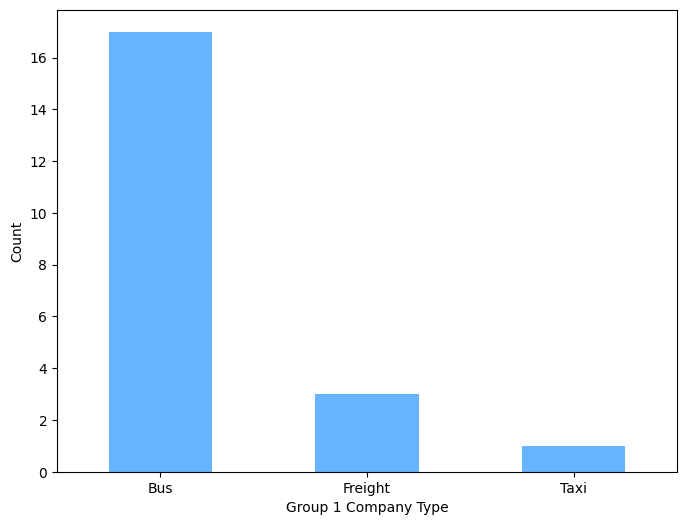

In [31]:
# 'Company' 열 기준으로 개수 세기

df_A = CORP_A[['CORP_CD','CORP_NM','Company']]
company_counts_A = df_A['Company'].value_counts()

# 그래프 그리기
plt.figure(figsize=(8, 6))
company_counts_A.plot(kind='bar', color = "#66b3ff")
# plt.title('Number of Companies by Type')
plt.xlabel('Group 1 Company Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
print(company_counts_A)
plt.show()



In [32]:
# 'CORP_CD'와 'REPORT_YM'을 기준으로 정렬
sorted_df = DMS_STATB_CORP01.sort_values(by=['CORP_CD', 'REPORT_YM'], ascending=[True, False])

# 'CORP_CD'별로 첫 번째 행만 유지 (가장 최근 데이터)
unique_rows = sorted_df.drop_duplicates(subset='CORP_CD')

# 특정 CORP_CD 값에 대한 행만 필터링
CORP_E = unique_rows[unique_rows['CORP_CD'].isin(Grouped_E)]
CORP_E['Company'] = ['Bus','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight',
                     'Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight',
                     'Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Bus','Freight','Freight','Freight',
                     'Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight',
                     'Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight']
CORP_E[['CORP_CD','CORP_NM','Company']]
# df = filtered_df[['CORP_CD','CORP_NM']]
# print(df.to_string(index=False))

/tmp/ipykernel_599603/3364799028.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CORP_E['Company'] = ['Bus','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight','Freight',


,CORP_CD,CORP_NM,Company
53817,3235,칠성관광(주),Bus
59034,6302,(주)하나통운,Freight
53844,10205,수림운수(주),Freight
53955,10917,"(주)중부물류(구,삼국유통(주))",Freight
53859,14043,(유)금남화물,Freight
...,...,...,...
59154,35261,(주)승리통운,Freight
59212,35995,경덕물류(주),Freight
63233,36733,(유)대성제휴,Freight
59172,37361,(주)대청운수,Freight


Company
Freight    63
Bus         2
Name: count, dtype: int64


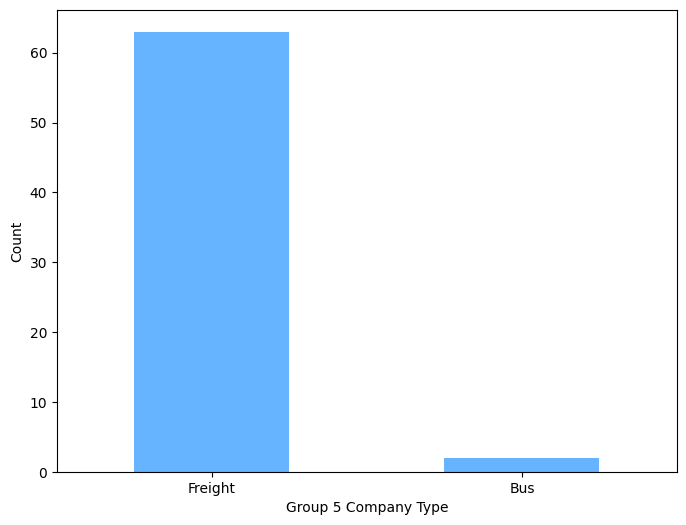

In [33]:
# 'Company' 열 기준으로 개수 세기

df_E = CORP_E[['CORP_CD','CORP_NM','Company']]
company_counts_E = df_E['Company'].value_counts()

# 그래프 그리기
plt.figure(figsize=(8, 6))
company_counts_E.plot(kind='bar', color="#66b3ff")
# plt.title('Number of Companies by Type')
plt.xlabel('Group 5 Company Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
print(company_counts_E)
plt.show()


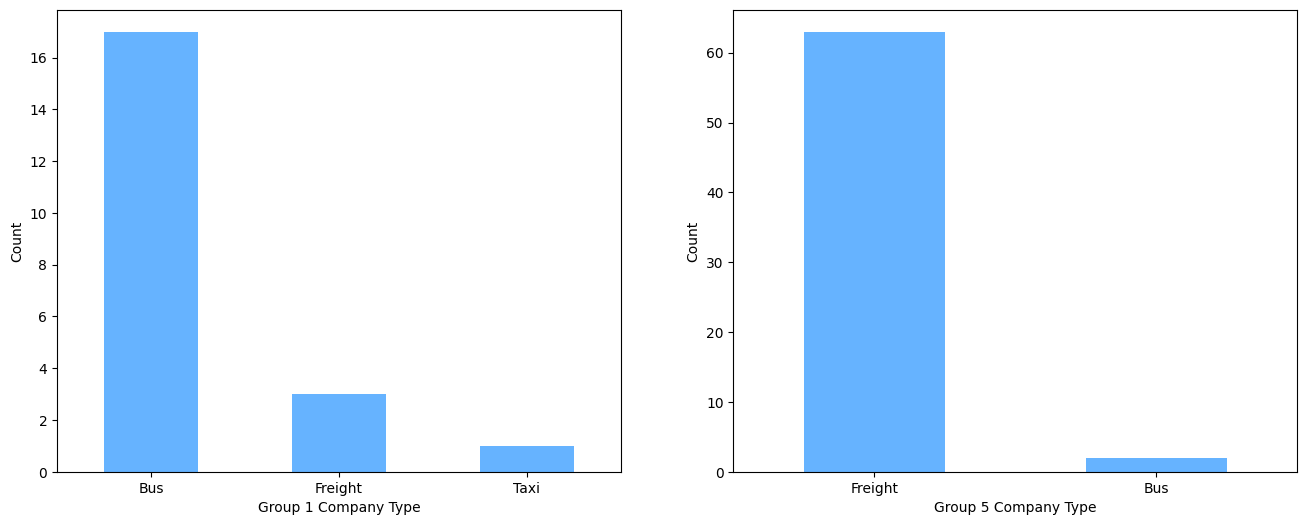

In [34]:
plt.figure(figsize=(16, 6))

plt.subplot(1,2,1)
# 그래프 그리기
company_counts_A.plot(kind='bar', color="#66b3ff")
# plt.title('Number of Companies by Type')
plt.xlabel('Group 1 Company Type')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1,2,2)
company_counts_E.plot(kind='bar', color="#66b3ff")
# plt.title('Number of Companies by Type')
plt.xlabel('Group 5 Company Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## 5. 위험운전 유형 3가지의 그룹1 Top4, 그룹5 Top4 분석

In [35]:
CD_DTG[CD_DTG['Group']=='Group_1'].head(4)

,TRANSCO_CD,Speeding,Long-term speeding,Sudden acceleration,Sudden start,Sudden deceleration,Sudden stop,Sudden left turn,Sudden right turn,Sudden U-turn,Sudden overtaking,Sudden lane change,Total_Sum,Group
0,1375,545260,0,3282864,142,1492254,319892,459568,262886,29161,229274,602963,7224264,Group_1
1,1386,179172,0,2900419,172,1214898,360479,395524,239466,31662,178486,607664,6107942,Group_1
2,1376,225128,0,2908411,572,985675,235202,361650,205016,49051,187122,660407,5818234,Group_1
3,1373,183506,0,2851735,756,995762,245403,333730,182160,21659,204999,716121,5735831,Group_1


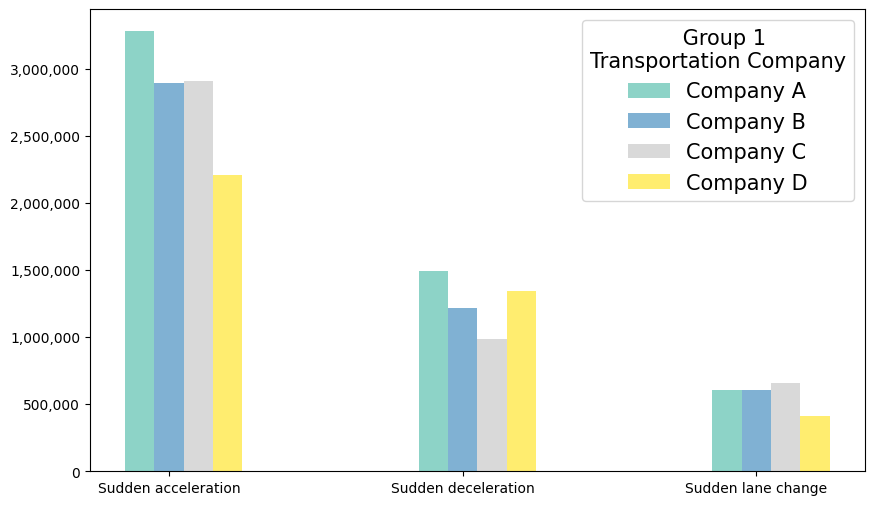

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 데이터프레임을 만듭니다.
data = CD_DTG[CD_DTG['TRANSCO_CD'].isin([1375,1386,1376,1374])].reset_index(drop=True)[['TRANSCO_CD','Sudden acceleration','Sudden deceleration','Sudden lane change']]
df = pd.DataFrame(data)

# 데이터를 재구조화하여 '위험운전 종류'를 기준으로 데이터를 그룹화합니다.
df_melted = df.melt(id_vars='TRANSCO_CD', var_name='Driving Behavior', value_name='Count')

# TRANSCO_CD와 회사 레이블 간의 매핑
transco_to_company = {
    1375: 'Company A',
    1386: 'Company B',
    1376: 'Company C',
    1374: 'Company D'
}

# 막대 그래프의 너비를 설정합니다.
bar_width = 0.1

# df_melted에 'Company' 열 추가
df_melted['Company'] = df_melted['TRANSCO_CD'].map(transco_to_company)

categories = df_melted['Driving Behavior'].unique()
positions = np.arange(len(categories))

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 순서를 제어하기 위해 고유한 회사 레이블 리스트 생성
companies = ['Company A', 'Company B', 'Company C', 'Company D']
colors = plt.get_cmap('Set3')(np.linspace(0, 1, len(companies)))
#Set3, viridis, plasma, inferno, magma

# 각 회사별로 막대를 그립니다.
for i, (company, color) in enumerate(zip(companies, colors)):
    company_data = df_melted[df_melted['Company'] == company]
    plt.bar(positions + i * bar_width, company_data['Count'], bar_width, label=company, color=color)
    
# x축에 '위험운전 종류' 값을 표시합니다.
plt.xticks(positions + bar_width, categories)

# x축과 y축 레이블을 추가합니다.
# plt.xlabel('Risky Driving Behavior')
# plt.ylabel('Count')

# 그래프 제목을 추가합니다.
# plt.title('Count of Risky Driving Behaviors by Transportation Company')

# 범례를 추가합니다.
plt.legend(title='              Group 1 \nTransportation Company', fontsize=15, title_fontsize=15)
plt.gca().ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# 그래프를 화면에 표시합니다.
plt.show()


In [37]:
CD_DTG[CD_DTG['Group']=='Group_5'].head(4)

,TRANSCO_CD,Speeding,Long-term speeding,Sudden acceleration,Sudden start,Sudden deceleration,Sudden stop,Sudden left turn,Sudden right turn,Sudden U-turn,Sudden overtaking,Sudden lane change,Total_Sum,Group
437,22964,3550,0,6108,6,3449,661,140,183,47,276,2242,16662,Group_5
448,24971,3785,0,2889,43,1954,2889,402,669,232,253,2790,15906,Group_5
516,24679,2161,0,3991,34,2386,1675,517,676,45,7,351,11843,Group_5
612,14726,1109,0,2938,3,1066,295,616,544,45,325,1759,8700,Group_5


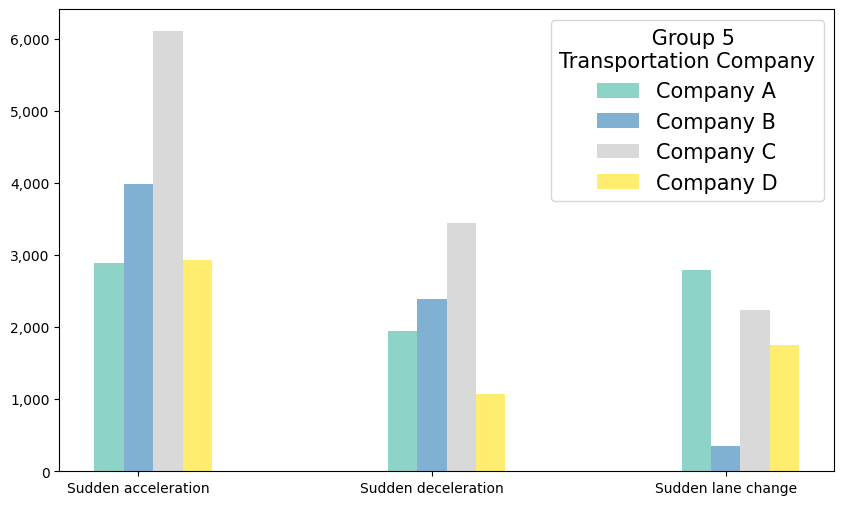

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 데이터프레임을 만듭니다.
data = CD_DTG[CD_DTG['TRANSCO_CD'].isin([22964,24971,24679,14726])].reset_index(drop=True)[['TRANSCO_CD','Sudden acceleration','Sudden deceleration','Sudden lane change']]
df = pd.DataFrame(data)

# 데이터를 재구조화하여 '위험운전 종류'를 기준으로 데이터를 그룹화합니다.
df_melted = df.melt(id_vars='TRANSCO_CD', var_name='Driving Behavior', value_name='Count')

# TRANSCO_CD와 회사 레이블 간의 매핑
transco_to_company = {
    24971: 'Company A',
    24679: 'Company B',
    22964: 'Company C',
    14726: 'Company D'
}

# 막대 그래프의 너비를 설정합니다.
bar_width = 0.1

# df_melted에 'Company' 열 추가
df_melted['Company'] = df_melted['TRANSCO_CD'].map(transco_to_company)

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 순서를 제어하기 위해 고유한 회사 레이블 리스트 생성
companies = ['Company A', 'Company B', 'Company C', 'Company D']
colors = plt.get_cmap('Set3')(np.linspace(0, 1, len(companies)))
#Set3, viridis, plasma, inferno, magma

# 각 회사별로 막대를 그립니다.
for i, (company, color) in enumerate(zip(companies, colors)):
    company_data = df_melted[df_melted['Company'] == company]
    plt.bar(positions + i * bar_width, company_data['Count'], bar_width, label=company, color = color)
    
# x축에 '위험운전 종류' 값을 표시합니다.
plt.xticks(positions + bar_width, categories)

# x축과 y축 레이블을 추가합니다.
# plt.xlabel('Risky Driving Behavior')
# plt.ylabel('Count')

# 그래프 제목을 추가합니다.
# plt.title('Count of Risky Driving Behaviors by Transportation Company')

# 범례를 추가합니다.
plt.legend(title='              Group 5 \nTransportation Company', fontsize=15, title_fontsize=15)
plt.gca().ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# 그래프를 화면에 표시합니다.
plt.show()


## 6. 그룹1회사A, 그룹5회사C 비교분석

In [39]:
import pandas as pd
DMS_STATB_CORP02 = pd.read_csv("/home/jin_jb/DTG/DATA/AI모델자료/DMS_STATB_CORP02.csv", sep="\t", encoding='UTF-8')
A = DMS_STATB_CORP02[(DMS_STATB_CORP02['CORP_CD'] == 1375) & (DMS_STATB_CORP02['REPORT_YM'] == 201912)]

In [40]:
# 현재 경력과 전체 경력에 대한 집계를 위한 수정된 함수 정의

def aggregate_career_corrected(data, prefix):
    """
    경력 데이터를 수정하여 집계하는 함수.
    
    :param data: DataFrame, 원본 데이터
    :param prefix: str, 집계할 경력 데이터의 컬럼 접두사 ('NOW_CAREER' 또는 'TOT_CAREER')
    :return: DataFrame, 집계된 경력 데이터
    """
    # 1년 미만
    data[f'{prefix}_LT1'] = data[f'{prefix}00']
    # 1년~5년
    data[f'{prefix}_1TO5'] = data[[f'{prefix}{i:02d}' for i in range(1, 6)]].sum(axis=1)
    # 5년~10년
    data[f'{prefix}_5TO10'] = data[[f'{prefix}{i:02d}' for i in range(6, 11)]].sum(axis=1)
    # 10년 이상
    data[f'{prefix}_10TO15'] = data[[f'{prefix}{i:02d}' for i in range(11, 16)]].sum(axis=1)
    data[f'{prefix}_15TO20'] = data[[f'{prefix}{i:02d}' for i in range(16, 21)]].sum(axis=1)
    data[f'{prefix}_20TO25'] = data[[f'{prefix}{i:02d}' for i in range(21, 26)]].sum(axis=1)
    # 경력 데이터의 최대 범위 확인을 위해 컬럼 목록에서 매칭되는 가장 큰 값을 찾음
    max_career_year = max([int(col.replace(prefix, '')) for col in data.columns if col.startswith(prefix) and col[len(prefix):].isdigit()])
    data[f'{prefix}_GT25'] = data[[f'{prefix}{i:02d}' for i in range(26, max_career_year + 1)]].sum(axis=1)
    
    # 필요한 컬럼만 선택
    aggregated_data = data[[f'{prefix}_LT1', f'{prefix}_1TO5', f'{prefix}_5TO10', f'{prefix}_10TO15', 
                            f'{prefix}_15TO20', f'{prefix}_20TO25',f'{prefix}_GT25']]
    
    return aggregated_data

# 현재 경력 데이터 집계 (수정)
now_career_aggregated_corrected = aggregate_career_corrected(A, 'NOW_CAREER')

# 확인을 위해 현재 경력 집계 결과의 처음 몇 줄을 출력
now_career_aggregated_corrected


/tmp/ipykernel_599603/512188449.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{prefix}_LT1'] = data[f'{prefix}00']
/tmp/ipykernel_599603/512188449.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{prefix}_1TO5'] = data[[f'{prefix}{i:02d}' for i in range(1, 6)]].sum(axis=1)
/tmp/ipykernel_599603/512188449.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,NOW_CAREER_LT1,NOW_CAREER_1TO5,NOW_CAREER_5TO10,NOW_CAREER_10TO15,NOW_CAREER_15TO20,NOW_CAREER_20TO25,NOW_CAREER_GT25
66558,34,123,33,17,30,16,5


In [41]:
# 전체 경력 데이터 집계 (수정)
tot_career_aggregated_corrected = aggregate_career_corrected(A, 'TOT_CAREER')
tot_career_aggregated_corrected

/tmp/ipykernel_599603/512188449.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{prefix}_LT1'] = data[f'{prefix}00']
/tmp/ipykernel_599603/512188449.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{prefix}_1TO5'] = data[[f'{prefix}{i:02d}' for i in range(1, 6)]].sum(axis=1)
/tmp/ipykernel_599603/512188449.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,TOT_CAREER_LT1,TOT_CAREER_1TO5,TOT_CAREER_5TO10,TOT_CAREER_10TO15,TOT_CAREER_15TO20,TOT_CAREER_20TO25,TOT_CAREER_GT25
66558,4,56,49,30,41,40,38


In [42]:
# 나이 데이터 집계를 위한 수정된 함수 정의

def aggregate_age_corrected(data):
    """
    나이 데이터를 수정하여 집계하는 함수.
    
    :param data: DataFrame, 원본 데이터
    :return: DataFrame, 집계된 나이 데이터
    """
    # 'AGE_AVG'와 같은 평균 값을 나타내는 컬럼을 제외하고 숫자로만 끝나는 컬럼만 선택
    age_columns = [col for col in data.columns if col.startswith('AGE') and col[3:].isdigit()]
    age_aggregated_data = pd.DataFrame(index=data.index)

    # 10살 단위로 묶기 (0~20, 20~30, ... , 70 이상)
    for i in range(0, 70, 10):
        if i == 60:
            # 60 이상 모두 합치기
            cols_to_sum = [col for col in age_columns if int(col.replace('AGE', '')) >= i]
            age_aggregated_data[f'AGE_{i}UP'] = data[cols_to_sum].sum(axis=1)
        elif 30 <= i < 50:
            # 30부터 50까지는 5살 단위로 묶기
            for j in range(i, i+10, 10):
                cols_to_sum = [col for col in age_columns if j <= int(col.replace('AGE', '')) < j+10]
                age_aggregated_data[f'AGE_{j}TO{j+9}'] = data[cols_to_sum].sum(axis=1)
        elif 50 <= i < 60:
            # 30부터 50까지는 5살 단위로 묶기
            for j in range(i, i+10, 5):
                cols_to_sum = [col for col in age_columns if j <= int(col.replace('AGE', '')) < j+5]
                age_aggregated_data[f'AGE_{j}TO{j+4}'] = data[cols_to_sum].sum(axis=1)        
        else:
            # 그 외 10살 단위로 묶기
            cols_to_sum = [col for col in age_columns if i <= int(col.replace('AGE', '')) < i+10]
            age_aggregated_data[f'AGE_{i}TO{i+9}'] = data[cols_to_sum].sum(axis=1)

    return age_aggregated_data

# 나이 데이터 집계 (수정)
age_aggregated_corrected = aggregate_age_corrected(A)

# 확인을 위해 나이 집계 결과의 처음 몇 줄을 출력
age_aggregated_corrected.head()


,AGE_0TO9,AGE_10TO19,AGE_20TO29,AGE_30TO39,AGE_40TO49,AGE_50TO54,AGE_55TO59,AGE_60UP
66558,0.0,0.0,1,22,68,69,70,28.0


In [43]:
# Calculate the sum of the ages 30 to 70+
age_sum = age_aggregated_corrected.loc[:, "AGE_20TO29":"AGE_70UP"].sum(axis=1)

# Calculate the ratio for each relevant age group
for column in age_aggregated_corrected.loc[:, "AGE_20TO29":"AGE_70UP"].columns:
    age_aggregated_corrected[column] = age_aggregated_corrected[column] / age_sum

age_aggregated_corrected

,AGE_0TO9,AGE_10TO19,AGE_20TO29,AGE_30TO39,AGE_40TO49,AGE_50TO54,AGE_55TO59,AGE_60UP
66558,0.0,0.0,0.003876,0.085271,0.263566,0.267442,0.271318,0.108527


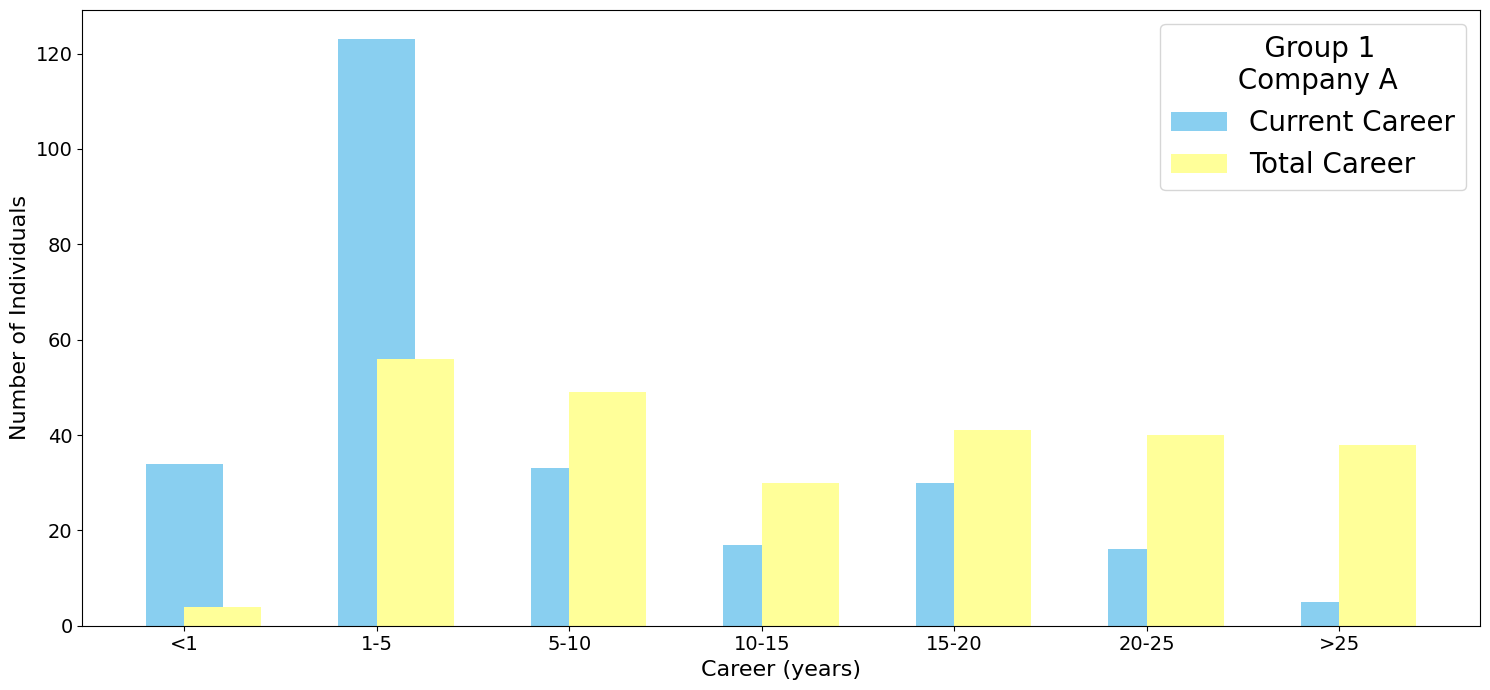

In [44]:
plt.figure(figsize=(15, 7))
# 현재 경력 데이터
now_career_stages = ['<1', '1-5', '5-10', '10-15', '15-20', '20-25', '>25']
now_career_counts = now_career_aggregated_corrected.iloc[0].values.tolist()


# 전체 경력 데이터
tot_career_stages = ['<1', '1-5', '5-10', '10-15', '15-20', '20-25', '>25']
tot_career_counts = tot_career_aggregated_corrected.iloc[0].values.tolist()



# 현재 경력 및 전체 경력 비교 막대 그래프
plt.bar(now_career_stages, now_career_counts, width=0.4, label='Current Career', align='center', color="#89CFF0")
plt.bar(tot_career_stages, tot_career_counts, width=0.4, label='Total Career', align='edge', color="#FFFF99")
# plt.title('Current vs Total Career Length Distribution')
plt.xlabel('Career (years)', fontsize=16)
plt.ylabel('Number of Individuals', fontsize=16)
# x축 및 y축의 레이블 폰트 크기를 조정
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='    Group 1 \n Company A', fontsize=20, title_fontsize=20)

plt.tight_layout()
plt.show()


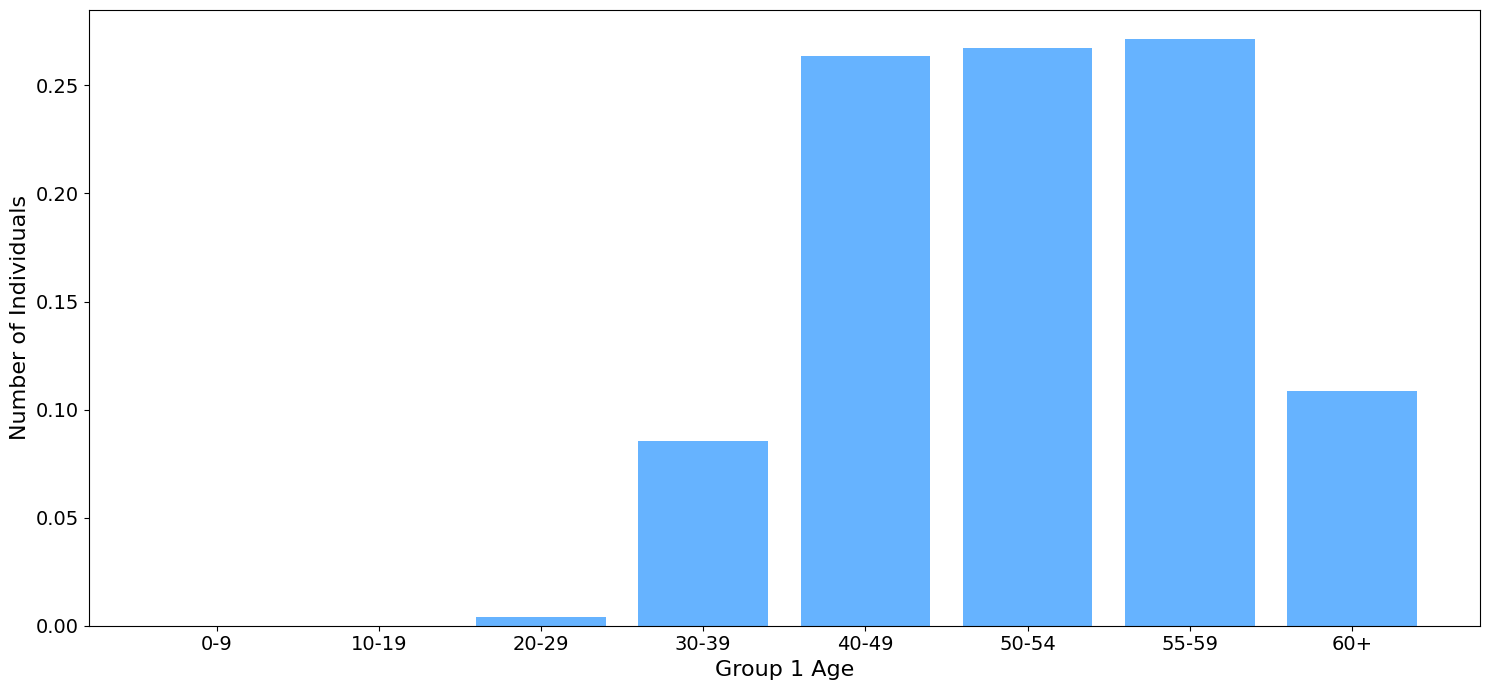

In [45]:
plt.figure(figsize=(15, 7))
# 나이 분포 데이터
age_groups = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-54', '55-59', '60+']
age_counts = age_aggregated_corrected.iloc[0].values.tolist()

# 나이 분포 막대 그래프
plt.bar(age_groups, age_counts, color="#66b3ff")
# plt.title('Age Distribution')
plt.xlabel('Group 1 Age', fontsize=16)
plt.ylabel('Number of Individuals', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

In [46]:
# pd.set_option('display.max_columns', None)

E = DMS_STATB_CORP02[(DMS_STATB_CORP02['CORP_CD'] == 22964) & (DMS_STATB_CORP02['REPORT_YM'] == 201912)]

In [47]:
# 현재 경력과 전체 경력에 대한 집계를 위한 수정된 함수 정의

def aggregate_career_corrected(data, prefix):
    """
    경력 데이터를 수정하여 집계하는 함수.
    
    :param data: DataFrame, 원본 데이터
    :param prefix: str, 집계할 경력 데이터의 컬럼 접두사 ('NOW_CAREER' 또는 'TOT_CAREER')
    :return: DataFrame, 집계된 경력 데이터
    """
    # 1년 미만
    data[f'{prefix}_LT1'] = data[f'{prefix}00']
    # 1년~5년
    data[f'{prefix}_1TO5'] = data[[f'{prefix}{i:02d}' for i in range(1, 6)]].sum(axis=1)
    # 5년~10년
    data[f'{prefix}_5TO10'] = data[[f'{prefix}{i:02d}' for i in range(6, 11)]].sum(axis=1)
    # 10년 이상
    data[f'{prefix}_10TO15'] = data[[f'{prefix}{i:02d}' for i in range(11, 16)]].sum(axis=1)
    data[f'{prefix}_15TO20'] = data[[f'{prefix}{i:02d}' for i in range(16, 21)]].sum(axis=1)
    data[f'{prefix}_20TO25'] = data[[f'{prefix}{i:02d}' for i in range(21, 26)]].sum(axis=1)
    # 경력 데이터의 최대 범위 확인을 위해 컬럼 목록에서 매칭되는 가장 큰 값을 찾음
    max_career_year = max([int(col.replace(prefix, '')) for col in data.columns if col.startswith(prefix) and col[len(prefix):].isdigit()])
    data[f'{prefix}_GT25'] = data[[f'{prefix}{i:02d}' for i in range(26, max_career_year + 1)]].sum(axis=1)
    
    # 필요한 컬럼만 선택
    aggregated_data = data[[f'{prefix}_LT1', f'{prefix}_1TO5', f'{prefix}_5TO10', f'{prefix}_10TO15', 
                            f'{prefix}_15TO20', f'{prefix}_20TO25',f'{prefix}_GT25']]
    
    return aggregated_data

# 현재 경력 데이터 집계 (수정)
now_career_aggregated_corrected = aggregate_career_corrected(E, 'NOW_CAREER')

# 확인을 위해 현재 경력 집계 결과의 처음 몇 줄을 출력
now_career_aggregated_corrected


/tmp/ipykernel_599603/614239560.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{prefix}_LT1'] = data[f'{prefix}00']
/tmp/ipykernel_599603/614239560.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{prefix}_1TO5'] = data[[f'{prefix}{i:02d}' for i in range(1, 6)]].sum(axis=1)
/tmp/ipykernel_599603/614239560.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,NOW_CAREER_LT1,NOW_CAREER_1TO5,NOW_CAREER_5TO10,NOW_CAREER_10TO15,NOW_CAREER_15TO20,NOW_CAREER_20TO25,NOW_CAREER_GT25
69689,16,19,6,0,0,0,0


In [48]:
# 전체 경력 데이터 집계 (수정)
tot_career_aggregated_corrected = aggregate_career_corrected(E, 'TOT_CAREER')
tot_career_aggregated_corrected

/tmp/ipykernel_599603/614239560.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{prefix}_LT1'] = data[f'{prefix}00']
/tmp/ipykernel_599603/614239560.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{prefix}_1TO5'] = data[[f'{prefix}{i:02d}' for i in range(1, 6)]].sum(axis=1)
/tmp/ipykernel_599603/614239560.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,TOT_CAREER_LT1,TOT_CAREER_1TO5,TOT_CAREER_5TO10,TOT_CAREER_10TO15,TOT_CAREER_15TO20,TOT_CAREER_20TO25,TOT_CAREER_GT25
69689,2,17,14,4,3,1,0


In [49]:
# 나이 데이터 집계를 위한 수정된 함수 정의

def aggregate_age_corrected(data):
    """
    나이 데이터를 수정하여 집계하는 함수.
    
    :param data: DataFrame, 원본 데이터
    :return: DataFrame, 집계된 나이 데이터
    """
    # 'AGE_AVG'와 같은 평균 값을 나타내는 컬럼을 제외하고 숫자로만 끝나는 컬럼만 선택
    age_columns = [col for col in data.columns if col.startswith('AGE') and col[3:].isdigit()]
    age_aggregated_data = pd.DataFrame(index=data.index)

    # 10살 단위로 묶기 (0~20, 20~30, ... , 70 이상)
    for i in range(0, 70, 10):
        if i == 60:
            # 60 이상 모두 합치기
            cols_to_sum = [col for col in age_columns if int(col.replace('AGE', '')) >= i]
            age_aggregated_data[f'AGE_{i}UP'] = data[cols_to_sum].sum(axis=1)
        elif 30 <= i < 50:
            # 30부터 50까지는 5살 단위로 묶기
            for j in range(i, i+10, 10):
                cols_to_sum = [col for col in age_columns if j <= int(col.replace('AGE', '')) < j+10]
                age_aggregated_data[f'AGE_{j}TO{j+9}'] = data[cols_to_sum].sum(axis=1)
        elif 50 <= i < 60:
            # 30부터 50까지는 5살 단위로 묶기
            for j in range(i, i+10, 5):
                cols_to_sum = [col for col in age_columns if j <= int(col.replace('AGE', '')) < j+5]
                age_aggregated_data[f'AGE_{j}TO{j+4}'] = data[cols_to_sum].sum(axis=1)        
        else:
            # 그 외 10살 단위로 묶기
            cols_to_sum = [col for col in age_columns if i <= int(col.replace('AGE', '')) < i+10]
            age_aggregated_data[f'AGE_{i}TO{i+9}'] = data[cols_to_sum].sum(axis=1)

    return age_aggregated_data

# 나이 데이터 집계 (수정)
age_aggregated_corrected = aggregate_age_corrected(E)

# 확인을 위해 나이 집계 결과의 처음 몇 줄을 출력
age_aggregated_corrected.head()


,AGE_0TO9,AGE_10TO19,AGE_20TO29,AGE_30TO39,AGE_40TO49,AGE_50TO54,AGE_55TO59,AGE_60UP
69689,0.0,0.0,0,5,14,11,5,6.0


In [50]:
# Calculate the sum of the ages 30 to 70+
age_sum = age_aggregated_corrected.loc[:, "AGE_30TO39":"AGE_70UP"].sum(axis=1)

# Calculate the ratio for each relevant age group
for column in age_aggregated_corrected.loc[:, "AGE_30TO39":"AGE_70UP"].columns:
    age_aggregated_corrected[column] = age_aggregated_corrected[column] / age_sum

age_aggregated_corrected

,AGE_0TO9,AGE_10TO19,AGE_20TO29,AGE_30TO39,AGE_40TO49,AGE_50TO54,AGE_55TO59,AGE_60UP
69689,0.0,0.0,0,0.121951,0.341463,0.268293,0.121951,0.146341


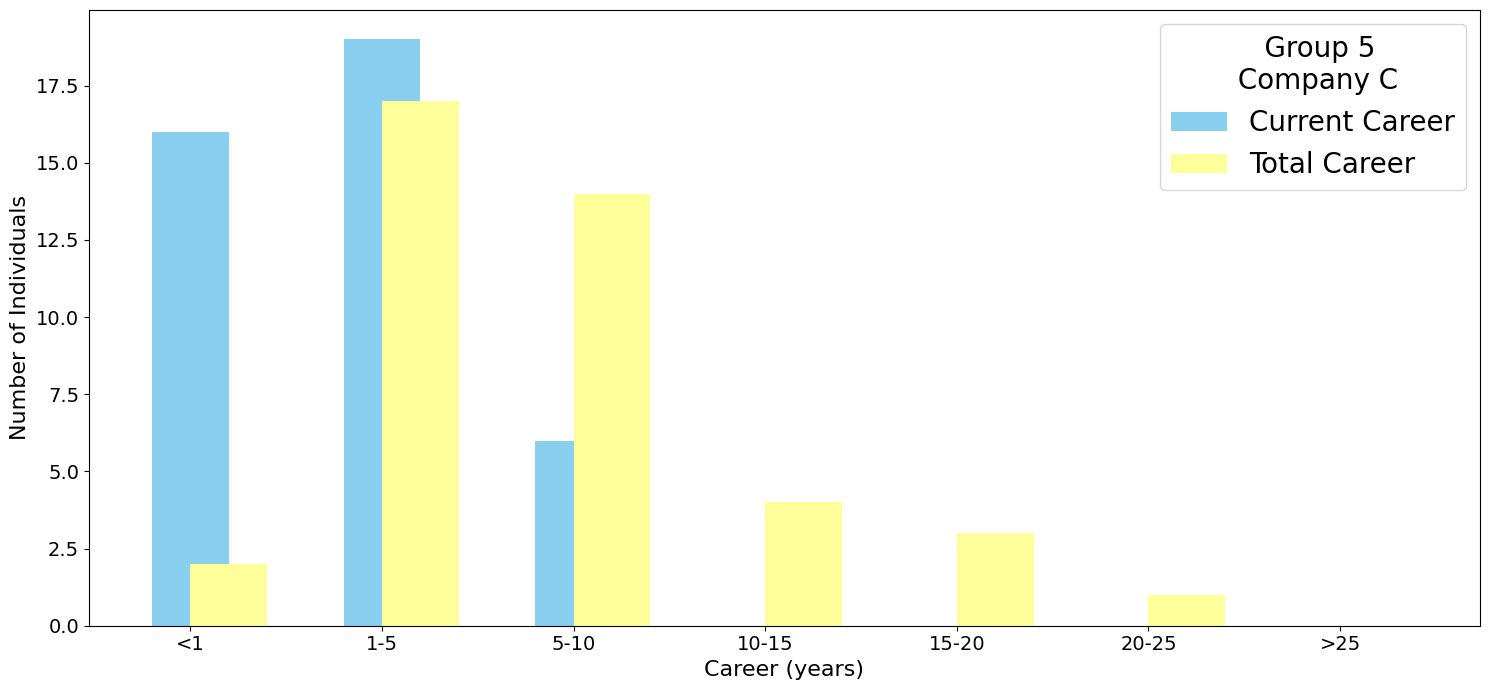

In [51]:
plt.figure(figsize=(15, 7))
# 현재 경력 데이터
now_career_stages = ['<1', '1-5', '5-10', '10-15', '15-20', '20-25', '>25']
now_career_counts = now_career_aggregated_corrected.iloc[0].values.tolist()


# 전체 경력 데이터
tot_career_stages = ['<1', '1-5', '5-10', '10-15', '15-20', '20-25', '>25']
tot_career_counts = tot_career_aggregated_corrected.iloc[0].values.tolist()



# 현재 경력 및 전체 경력 비교 막대 그래프
plt.bar(now_career_stages, now_career_counts, width=0.4, label='Current Career', align='center', color="#89CFF0")
plt.bar(tot_career_stages, tot_career_counts, width=0.4, label='Total Career', align='edge', color="#FFFF99")
# plt.title('Current vs Total Career Length Distribution')
plt.xlabel('Career (years)', fontsize=16)
plt.ylabel('Number of Individuals', fontsize=16)
# x축 및 y축의 레이블 폰트 크기를 조정
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='    Group 5 \n Company C', fontsize=20, title_fontsize=20)


plt.tight_layout()
plt.show()


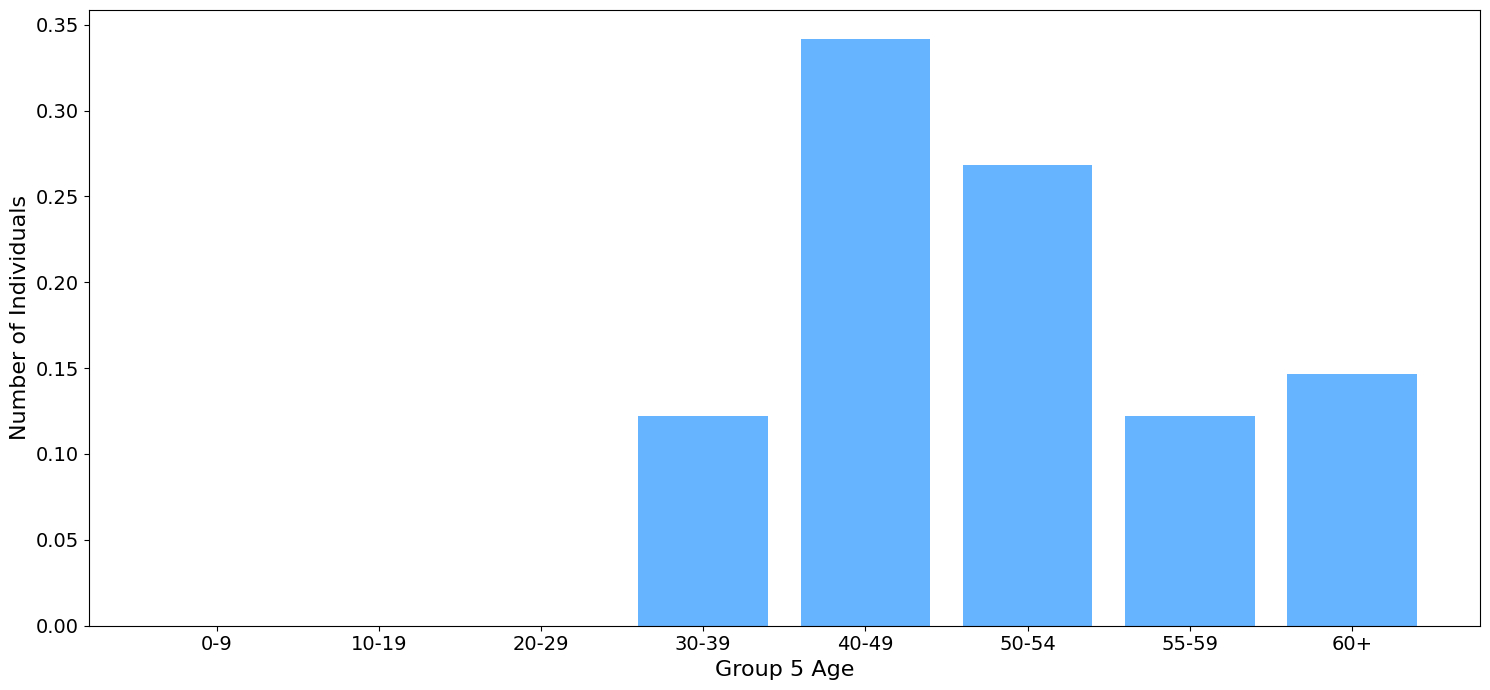

In [52]:
plt.figure(figsize=(15, 7))
# 나이 분포 데이터
age_groups = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-54', '55-59', '60+']
age_counts = age_aggregated_corrected.iloc[0].values.tolist()

# 나이 분포 막대 그래프
plt.bar(age_groups, age_counts, color="#66b3ff")
# plt.title('Age Distribution')
plt.xlabel('Group 5 Age', fontsize=16)
plt.ylabel('Number of Individuals', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()